# Projet Pandas

**Ressources Utiles pour le projet:**

* https://pandas.pydata.org/docs/getting_started/index.html

* https://pandas.pydata.org/docs/user_guide/10min.html#min

* https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook 

* https://towardsdatascience.com/a-checklist-for-data-wrangling-8f106c093fef


## Importer les Libraries de dépendances

In [16]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns

## chargement du Dataset

In [17]:
# charger le fichier locations.csv dans un pandas dataframe locations et afficher les 5 premières lignes de votre df
#TBD
df=pd.read_csv('locations.csv')
df.head(5)

,neighborhood,title,price,bedrooms,pid,longitude,date,subregion,link,latitude,sqft
0,(bayview),Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,$950,/ 1br -,4076905111,-122.396965,Sep 18 2013,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -
1,(bayview),Only walking distance to major shopping centers.,$950,/ 1br -,4076901755,-122.396793,Sep 18 2013,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -
2,(bayview),"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",$950,/ 1br -,4076899340,-122.397100,Sep 18 2013,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -
3,(financial district),"*NEW* Beautiful, Upscale Condo in Historic Jac...",$3300,/ 1br - 830ft² -,4067393707,-122.399747,Sep 18 2013,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -
4,(visitacion valley),楼上全层3房,$2000,/ 3br - 1280ft² -,4076901071,NaN,Sep 18 2013,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -


## Nettoyage des données

In [18]:
#  supprimer les parenthèses autour des valeurs de la colonne neighborhood 
df['neighborhood']= df['neighborhood'].str.replace('(','').str.replace(')','')
df
#  supprimer $  de la colonne priceet afficer les valeurs en tant que float
df['price']= df['price'].str.replace('$','')
df
#TBD
# df['price'] = df['price'].astype(float)
df.price = df.price.astype(float)
df.head()

<ipython-input-18-5ae913e84ac2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['neighborhood']= df['neighborhood'].str.replace('(','').str.replace(')','')
<ipython-input-18-5ae913e84ac2>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price']= df['price'].str.replace('$','')


,neighborhood,title,price,bedrooms,pid,longitude,date,subregion,link,latitude,sqft
0,bayview,Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,950.0,/ 1br -,4076905111,-122.396965,Sep 18 2013,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -
1,bayview,Only walking distance to major shopping centers.,950.0,/ 1br -,4076901755,-122.396793,Sep 18 2013,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -
2,bayview,"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",950.0,/ 1br -,4076899340,-122.397100,Sep 18 2013,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -
3,financial district,"*NEW* Beautiful, Upscale Condo in Historic Jac...",3300.0,/ 1br - 830ft² -,4067393707,-122.399747,Sep 18 2013,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -
4,visitacion valley,楼上全层3房,2000.0,/ 3br - 1280ft² -,4076901071,NaN,Sep 18 2013,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -


In [19]:
# Eclater le contenu de la colonne data en colonnes: month day year et supprimer la colonne d'orig (date)
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
# 
df = df.drop(['date'],axis=1)
df
#TBD

,neighborhood,title,price,bedrooms,pid,longitude,subregion,link,latitude,sqft,year,month,day
0,bayview,Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,950.0,/ 1br -,4076905111,-122.396965,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -,2013,9,18
1,bayview,Only walking distance to major shopping centers.,950.0,/ 1br -,4076901755,-122.396793,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -,2013,9,18
2,bayview,"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",950.0,/ 1br -,4076899340,-122.397100,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -,2013,9,18
3,financial district,"*NEW* Beautiful, Upscale Condo in Historic Jac...",3300.0,/ 1br - 830ft² -,4067393707,-122.399747,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -,2013,9,18
4,visitacion valley,楼上全层3房,2000.0,/ 3br - 1280ft² -,4076901071,NaN,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -,2013,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,mountain view,2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,2795.0,/ 2br - 940ft² -,4071933255,NaN,Peninsula,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -,2013,9,16
4996,san mateo,2 Bathroom 1 Bathroom Apartment Downtown San M...,2600.0,/ 2br - 955ft² -,4071969051,-122.325998,Peninsula,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -,2013,9,16
4997,woodside,"Updated 2 BR+Den, House in Woodside for Lease",4000.0,/ 2br -,4072004661,-122.274837,Peninsula,/pen/apa/4072004661.html,37.454546,/ 2br -,2013,9,16
4998,foster city,Nobody above or below in this quiet Town home ...,2395.0,/ 2br - 1020ft² -,4071994817,-122.261543,Peninsula,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -,2013,9,16


In [20]:
# definir une fonction clean_bedrooms qui permet de changer la colonne bedrooms pour garder uniquement le premier entier
def clean_bedrooms(df):
    df['bedrooms']=df.bedrooms.str[5]
clean_bedrooms(df)
df
# exemples: /1br - => 1 
# /3br - 1280ft² - => 3

#TBD


,neighborhood,title,price,bedrooms,pid,longitude,subregion,link,latitude,sqft,year,month,day
0,bayview,Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,950.0,1,4076905111,-122.396965,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -,2013,9,18
1,bayview,Only walking distance to major shopping centers.,950.0,1,4076901755,-122.396793,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -,2013,9,18
2,bayview,"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",950.0,1,4076899340,-122.397100,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -,2013,9,18
3,financial district,"*NEW* Beautiful, Upscale Condo in Historic Jac...",3300.0,1,4067393707,-122.399747,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -,2013,9,18
4,visitacion valley,楼上全层3房,2000.0,3,4076901071,NaN,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -,2013,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,mountain view,2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,2795.0,2,4071933255,NaN,Peninsula,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -,2013,9,16
4996,san mateo,2 Bathroom 1 Bathroom Apartment Downtown San M...,2600.0,2,4071969051,-122.325998,Peninsula,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -,2013,9,16
4997,woodside,"Updated 2 BR+Den, House in Woodside for Lease",4000.0,2,4072004661,-122.274837,Peninsula,/pen/apa/4072004661.html,37.454546,/ 2br -,2013,9,16
4998,foster city,Nobody above or below in this quiet Town home ...,2395.0,2,4071994817,-122.261543,Peninsula,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -,2013,9,16


In [21]:
# definir une fonction clean_surface qui permet de changer la colonne sqft et garder uniquement le dernier entier
# exemple: /3br - 1280ft² - => 1280
def convertsqft(dfcol):
    return dfcol.str.extract('(\d{2,5})')

df['sqft'] = convertsqft(df['sqft'])
df.head(50)
#TBD

,neighborhood,title,price,bedrooms,pid,longitude,subregion,link,latitude,sqft,year,month,day
0,bayview,Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,950.0,1,4076905111,-122.396965,SF,/sfc/apa/4076905111.html,37.761216,NaN,2013,9,18
1,bayview,Only walking distance to major shopping centers.,950.0,1,4076901755,-122.396793,SF,/sfc/apa/4076901755.html,37.761080,NaN,2013,9,18
2,bayview,"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",950.0,1,4076899340,-122.397100,SF,/sfc/apa/4076899340.html,37.762100,NaN,2013,9,18
3,financial district,"*NEW* Beautiful, Upscale Condo in Historic Jac...",3300.0,1,4067393707,-122.399747,SF,/sfc/apa/4067393707.html,37.798108,830,2013,9,18
4,visitacion valley,楼上全层3房,2000.0,3,4076901071,NaN,SF,/sfc/apa/4076901071.html,NaN,1280,2013,9,18
5,bernal heights,"2 Bedroom House w/Bonus Room, Fireplace, Yard,...",3850.0,2,4076899828,NaN,SF,/sfc/apa/4076899828.html,NaN,NaN,2013,9,18
6,marina / cow hollow,"♥♥♥ Chic, cozy & sunny in Marina ♥♥♥",3399.0,,4076892173,NaN,SF,/sfc/apa/4076892173.html,NaN,NaN,2013,9,18
7,north beach / telegraph hill,Fully Furnished 2BR/2BA Condo with Bay View,5250.0,2,4076895917,NaN,SF,/sfc/apa/4076895917.html,NaN,1000,2013,9,18
8,bayview,"We accept either 6, 12 month or month-to-month...",950.0,1,4076896866,-122.397137,SF,/sfc/apa/4076896866.html,37.762030,NaN,2013,9,18
9,bayview,"3 Bayside Village Pl, San Francisco, CA 94107",950.0,1,4076892885,-122.396450,SF,/sfc/apa/4076892885.html,37.764065,NaN,2013,9,18


## Manipulation des données :

### Partie1:

1. Trouvez des valeurs aberrantes en loyer, par exemple en dessous de 200 ou au-dessus de 10 000
2. Analyser les données sans les valeurs manquantes
1. définir un nouveau dataset sans les valeurs aberrantes

In [22]:
df.describe()

,price,pid,longitude,latitude,year,month,day
count,4908.000000,5.000000e+03,3143.000000,3143.000000,5000.0,5000.0,5000.000000
mean,2656.999389,4.068059e+09,-122.264948,37.757411,2013.0,9.0,17.523800
std,1915.147477,1.344453e+07,0.278825,0.364646,0.0,0.0,0.766258
min,1.000000,4.008227e+09,-123.799100,36.813820,2013.0,9.0,14.000000
25%,1695.000000,4.065685e+09,-122.442365,37.469365,2013.0,9.0,17.000000
50%,2208.500000,4.074290e+09,-122.283714,37.760858,2013.0,9.0,18.000000
75%,2995.000000,4.075949e+09,-122.045048,37.900832,2013.0,9.0,18.000000
max,35000.000000,4.076908e+09,-120.034132,41.456848,2013.0,9.0,18.000000


In [23]:
df1=df[df['price']>200]
df2=df[df['price']<10000]
df3=pd.concat([df1,df2])
df3

,neighborhood,title,price,bedrooms,pid,longitude,subregion,link,latitude,sqft,year,month,day
0,bayview,Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,950.0,1,4076905111,-122.396965,SF,/sfc/apa/4076905111.html,37.761216,NaN,2013,9,18
1,bayview,Only walking distance to major shopping centers.,950.0,1,4076901755,-122.396793,SF,/sfc/apa/4076901755.html,37.761080,NaN,2013,9,18
2,bayview,"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",950.0,1,4076899340,-122.397100,SF,/sfc/apa/4076899340.html,37.762100,NaN,2013,9,18
3,financial district,"*NEW* Beautiful, Upscale Condo in Historic Jac...",3300.0,1,4067393707,-122.399747,SF,/sfc/apa/4067393707.html,37.798108,830,2013,9,18
4,visitacion valley,楼上全层3房,2000.0,3,4076901071,NaN,SF,/sfc/apa/4076901071.html,NaN,1280,2013,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,mountain view,2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,2795.0,2,4071933255,NaN,Peninsula,/pen/apa/4071933255.html,NaN,940,2013,9,16
4996,san mateo,2 Bathroom 1 Bathroom Apartment Downtown San M...,2600.0,2,4071969051,-122.325998,Peninsula,/pen/apa/4071969051.html,37.560763,955,2013,9,16
4997,woodside,"Updated 2 BR+Den, House in Woodside for Lease",4000.0,2,4072004661,-122.274837,Peninsula,/pen/apa/4072004661.html,37.454546,NaN,2013,9,16
4998,foster city,Nobody above or below in this quiet Town home ...,2395.0,2,4071994817,-122.261543,Peninsula,/pen/apa/4071994817.html,37.555698,1020,2013,9,16


<AxesSubplot:xlabel='price'>

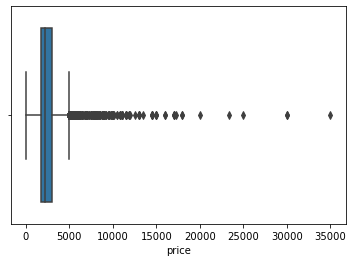

In [24]:
sns.boxplot(x='price', data=df)

In [25]:
df.dropna(axis=1)

,title,pid,subregion,link,year,month,day
0,Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,4076905111,SF,/sfc/apa/4076905111.html,2013,9,18
1,Only walking distance to major shopping centers.,4076901755,SF,/sfc/apa/4076901755.html,2013,9,18
2,"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",4076899340,SF,/sfc/apa/4076899340.html,2013,9,18
3,"*NEW* Beautiful, Upscale Condo in Historic Jac...",4067393707,SF,/sfc/apa/4067393707.html,2013,9,18
4,楼上全层3房,4076901071,SF,/sfc/apa/4076901071.html,2013,9,18
...,...,...,...,...,...,...,...
4995,2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,4071933255,Peninsula,/pen/apa/4071933255.html,2013,9,16
4996,2 Bathroom 1 Bathroom Apartment Downtown San M...,4071969051,Peninsula,/pen/apa/4071969051.html,2013,9,16
4997,"Updated 2 BR+Den, House in Woodside for Lease",4072004661,Peninsula,/pen/apa/4072004661.html,2013,9,16
4998,Nobody above or below in this quiet Town home ...,4071994817,Peninsula,/pen/apa/4071994817.html,2013,9,16


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  4986 non-null   object 
 1   title         5000 non-null   object 
 2   price         4908 non-null   float64
 3   bedrooms      4941 non-null   object 
 4   pid           5000 non-null   int64  
 5   longitude     3143 non-null   float64
 6   subregion     5000 non-null   object 
 7   link          5000 non-null   object 
 8   latitude      3143 non-null   float64
 9   sqft          3177 non-null   object 
 10  year          5000 non-null   int64  
 11  month         5000 non-null   int64  
 12  day           5000 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 507.9+ KB


In [27]:
df['price'].isna().sum()

92

In [28]:
len(df['price'])

5000

In [125]:
# df4 = df.dropna(axis=1)
# df4.describe()
#TBC

neighborhood      13
title              0
price              0
bedrooms           0
pid                0
longitude       1757
subregion          0
link               0
latitude        1757
sqft               0
year               0
month              0
day                0
dtype: int64


,price,pid,longitude,latitude,year,month,day
count,4851.000000,4.851000e+03,3094.000000,3094.000000,4851.0,4851.0,4851.000000
mean,2529.888889,4.068082e+09,-122.262421,37.755882,2013.0,9.0,17.526696
std,1359.640216,1.342302e+07,0.278971,0.365073,0.0,0.0,0.761617
min,250.000000,4.008227e+09,-123.799100,36.813820,2013.0,9.0,14.000000
25%,1695.000000,4.065695e+09,-122.440282,37.466532,2013.0,9.0,17.000000
50%,2200.000000,4.074304e+09,-122.278227,37.759540,2013.0,9.0,18.000000
75%,2950.000000,4.075956e+09,-122.042879,37.901224,2013.0,9.0,18.000000
max,9999.000000,4.076908e+09,-120.034132,41.456848,2013.0,9.0,18.000000


### Partie 2:

en utilisant le dernier Dataframe (avec les données propres) :
1. Filtrer les enregistrements avec plus de 5 chambres
2. Filtrer les enregistrements ayant des valeurs de sqft < 500 et > 3000
3. Créez un ensemble (set) de 5 catégories de prix qui incluent toutes les valeurs, précisez le nombre d’enregistrements dans chaque catégorie

In [13]:
filtered.head()

NameError: name 'filtered' is not defined

In [130]:

#TBC

In [15]:
#Filtrer les enregistrements ayant des valeurs de sqft < 500 et > 3000
df_clean['sqft']= pd.to_numeric(df_clean['sqft']) #pour comparer les int avec les int
df_clean = df_clean[(df_clean['sqft']>=500) & (df_clean['sqft']<=3000)]

#Supprimer les lignes avec des NaN
df_clean = df_clean.dropna()
df_clean.describe()
#Créez un ensemble (set) de 5 catégories de prix qui incluent toutes les valeurs, 
#précisez le nombre d’enregistrements dans chaque catégorie
inter = [200, 1500, 2000, 2500, 3000,10000]
cats = pd.cut(df_clean['price'],inter)
# TBC

print(pd.value_counts(cats))
df_clean.columns
# TBC

NameError: name 'df_clean' is not defined

## Enregistrement des données propres en BDD

**stocker votre jeu de données propore dans une Base de données que vous créerez** 

In [136]:

#TBD